In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
# guj_df = pd.read_csv(r"C:\Users\Divanshi\Downloads\8th sem project\NEW PROJECT\DATASETS\using\guj-wind-dataset.csv")
# krntk_df = pd.read_csv(r"C:\Users\Divanshi\Downloads\8th sem project\NEW PROJECT\DATASETS\using\kar-wind-dataset.csv")

guj_df= pd.read_csv(r'C:\Users\tsank\Downloads\guj-wind-dataset.csv')
krntk_df= pd.read_csv(r'C:\Users\tsank\Downloads\krntk-wind-dataset.csv')


In [5]:
# Inspect the first few rows and structure of both datasets
guj_df


,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,RH2M,T2M
0,2021,1,1,100.96,3.70,4.48,3.00,1.48,153.12,5.88,7.59,3.23,4.37,138.38,43.94,13.32
1,2021,1,2,100.95,4.05,5.83,3.25,2.58,279.31,6.47,7.45,3.88,3.58,264.50,45.31,13.48
2,2021,1,3,100.88,3.80,4.98,2.94,2.05,108.50,5.96,7.20,3.62,3.58,93.62,48.38,13.44
3,2021,1,4,100.82,3.38,4.09,2.43,1.66,177.69,5.24,6.91,3.40,3.50,178.06,56.12,14.05
4,2021,1,5,100.98,4.02,5.88,3.17,2.71,194.06,6.29,7.11,4.78,2.34,194.06,65.19,15.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024,1,28,101.17,3.45,6.27,1.04,5.23,167.69,5.13,8.75,1.05,7.70,167.69,39.06,20.89
1123,2024,1,29,101.17,2.68,4.20,1.72,2.48,301.56,4.20,6.41,1.94,4.48,301.62,69.06,22.83
1124,2024,1,30,101.05,3.16,4.79,1.34,3.45,289.25,4.66,7.07,1.45,5.63,289.56,68.00,23.66
1125,2024,1,31,100.94,4.09,6.64,2.49,4.15,261.44,6.02,7.65,4.66,2.98,261.56,74.69,22.82


In [7]:
krntk_df

,YEAR,MO,DY,T2M,RH2M,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
0,2021,1,1,19.34,80.56,93.81,4.21,6.21,2.74,3.47,96.19,6.52,7.48,5.44,2.04,96.19
1,2021,1,2,19.66,81.06,93.79,4.02,5.99,2.45,3.55,100.44,6.27,7.48,4.66,2.84,101.00
2,2021,1,3,22.01,81.50,93.65,3.35,5.52,1.77,3.76,113.94,5.24,6.66,3.47,3.20,114.12
3,2021,1,4,22.39,81.31,93.64,3.19,5.14,1.73,3.41,113.38,4.88,6.52,2.96,3.56,113.62
4,2021,1,5,21.54,84.25,93.71,2.41,4.49,0.68,3.81,98.25,3.89,5.53,0.91,4.62,98.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024,1,28,21.49,70.31,94.12,3.64,5.75,1.93,3.82,98.69,5.80,7.52,3.16,4.36,98.44
1123,2024,1,29,21.32,70.19,94.04,3.25,5.02,1.89,3.12,93.12,5.43,7.69,2.81,4.88,93.19
1124,2024,1,30,21.77,65.38,93.98,2.52,4.63,1.00,3.63,168.31,3.98,7.36,1.01,6.35,167.75
1125,2024,1,31,21.95,68.38,93.98,1.95,3.48,0.44,3.05,217.44,2.88,5.56,0.59,4.98,216.81


In [8]:
# Add lag features for wind speed at 10m and 50m for both datasets
for df in [guj_df, krntk_df]:
    df['WS10M_lag1'] = df['WS10M'].shift(1)
    df['WS50M_lag1'] = df['WS50M'].shift(1)
    df.fillna(df.mean(), inplace=True)

# Define features to scale
features_to_scale = ['PS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WD10M', 
                     'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'WD50M', 'RH2M', 
                     'T2M', 'WS10M_lag1', 'WS50M_lag1']

# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
for df in [guj_df, krntk_df]:
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


# Comparative Wind Speed Distribution
### These plots compare the wind speed distributions at 10 meters and 50 meters in Gujarat and Karnataka, showcasing the range, median, and quartiles of wind speeds in each region. The visualizations provide valuable insights into how wind speeds vary across different regions and at different heights

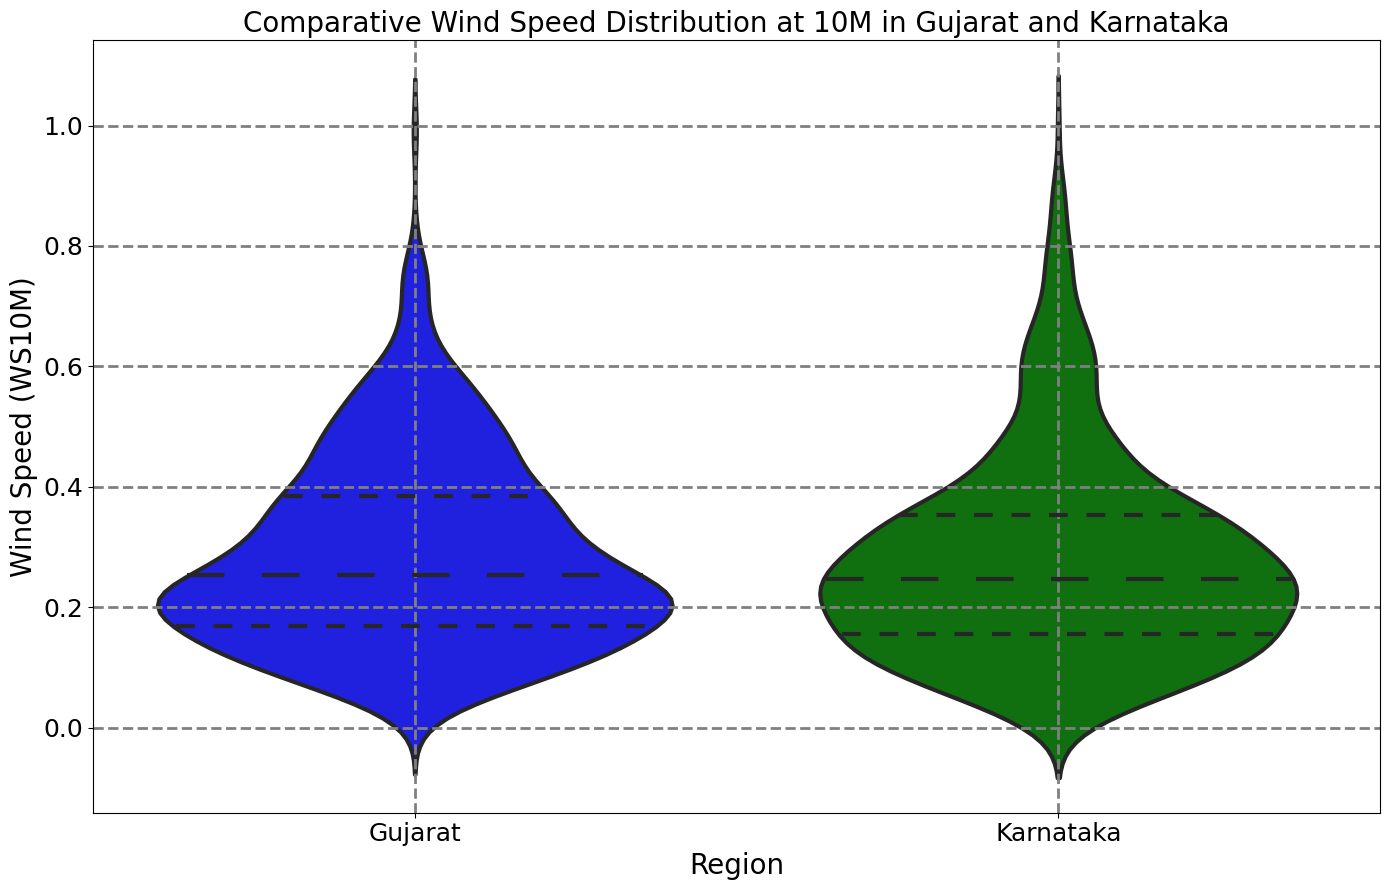

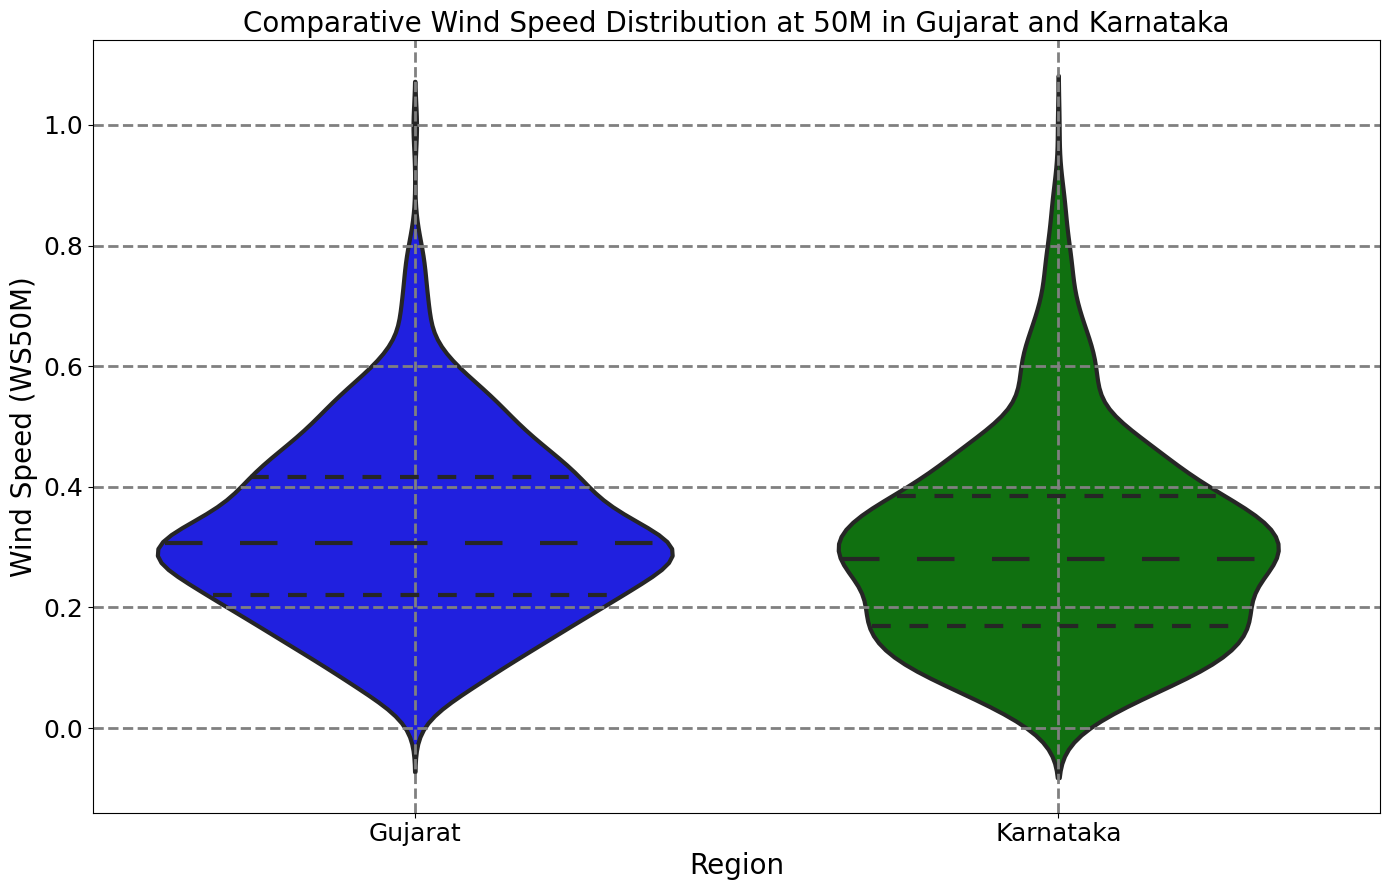

In [9]:

import seaborn as sns


def create_violin_plot(df, feature, title, ylabel):
    plt.figure(figsize=(14, 9))  
    data_to_plot = pd.concat([guj_df[[feature]].assign(Region='Gujarat'),
                              krntk_df[[feature]].assign(Region='Karnataka')])
    sns.violinplot(x='Region', y=feature, data=data_to_plot, palette=['blue', 'green'], 
                   inner='quartile', linewidth=3)  
    plt.title(title, fontsize=20)  
    plt.xlabel('Region', fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xticks(fontsize=18) 
    plt.yticks(fontsize=18) 
    plt.grid(True, which='major', linestyle='--', linewidth='2', color='grey')
    plt.tight_layout()
    plt.show()

# Creating violin plots with the updated aesthetics
create_violin_plot(guj_df, 'WS10M', 'Comparative Wind Speed Distribution at 10M in Gujarat and Karnataka', 'Wind Speed (WS10M)')
create_violin_plot(guj_df, 'WS50M', 'Comparative Wind Speed Distribution at 50M in Gujarat and Karnataka', 'Wind Speed (WS50M)')


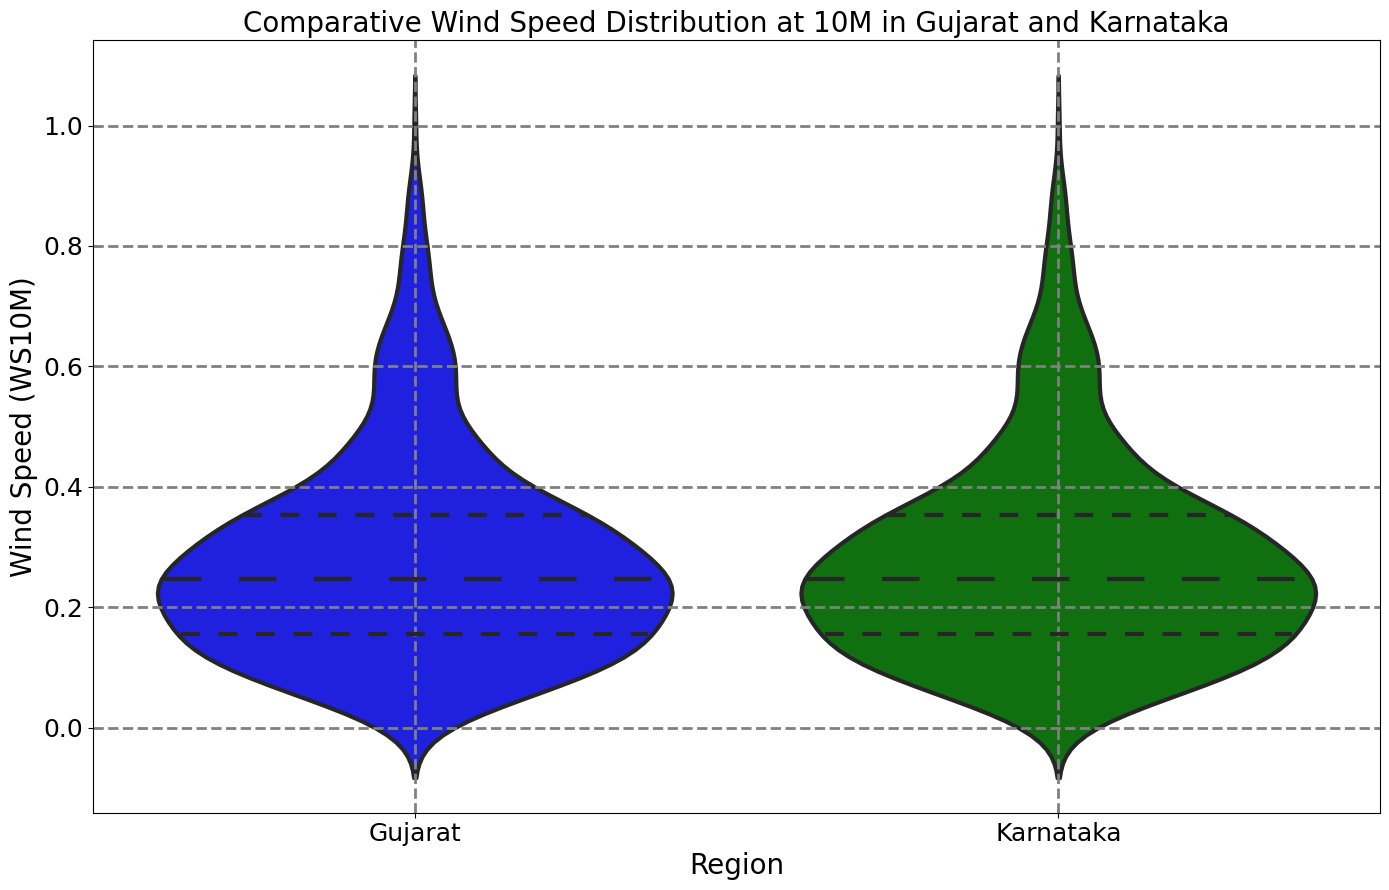

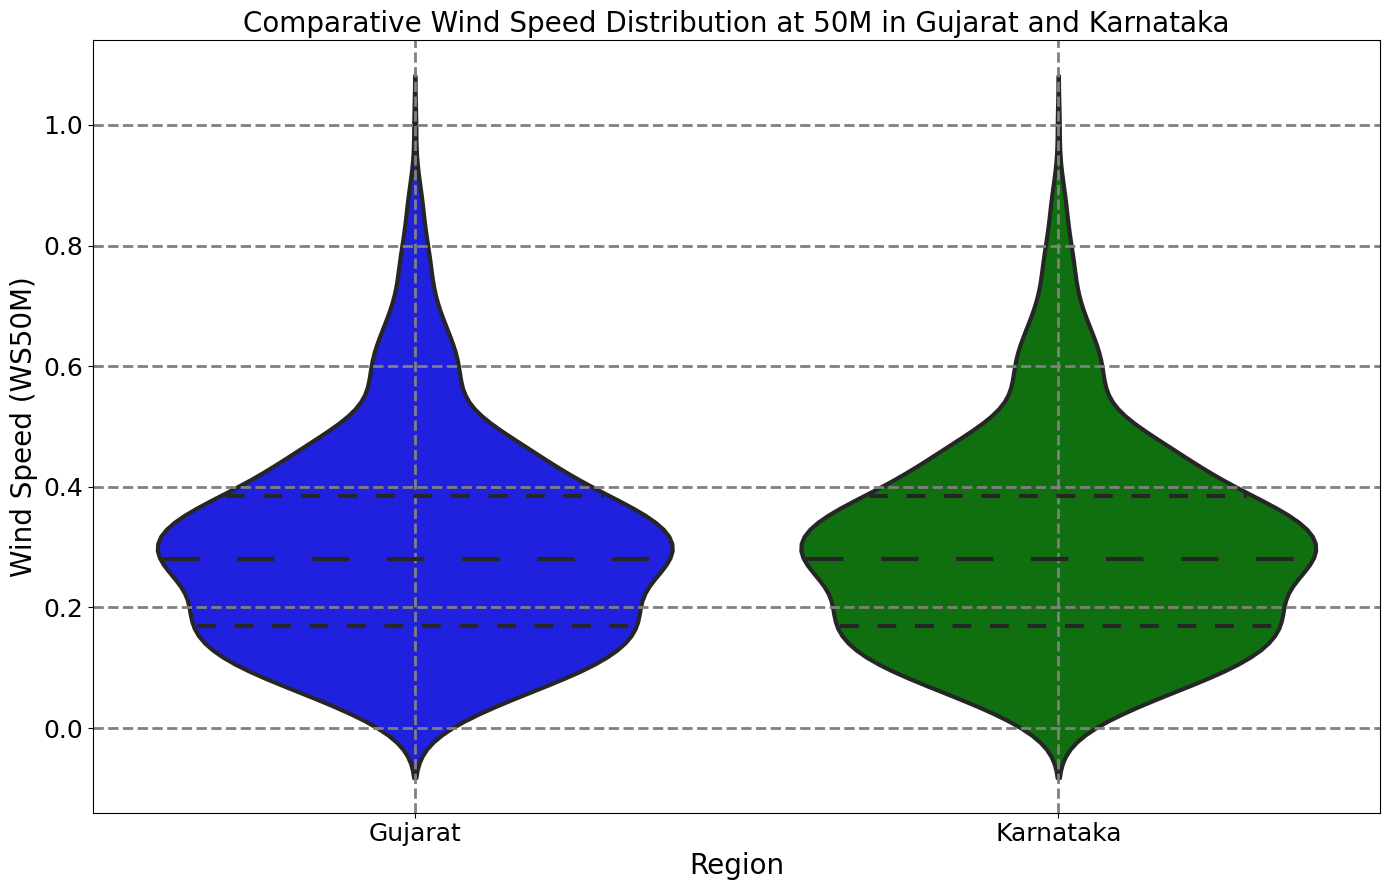

In [34]:

def create_violin_plot(df, feature, title, ylabel):
    plt.figure(figsize=(14, 9))  
    data_to_plot = pd.concat([krntk_df[[feature]].assign(Region='Gujarat'),
                              krntk_df[[feature]].assign(Region='Karnataka')])
    sns.violinplot(x='Region', y=feature, data=data_to_plot, palette=['blue', 'green'], 
                   inner='quartile', linewidth=3) 
    plt.title(title, fontsize=20)  
    plt.xlabel('Region', fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xticks(fontsize=18)  
    plt.yticks(fontsize=18)  
    plt.grid(True, which='major', linestyle='--', linewidth='2', color='grey')
    plt.tight_layout()
    plt.show()
    # Creating violin plots for Karnataka's WS10M and WS50M 
create_violin_plot(krntk_df, 'WS10M', 'Comparative Wind Speed Distribution at 10M in Gujarat and Karnataka', 'Wind Speed (WS10M)')
create_violin_plot(krntk_df, 'WS50M', 'Comparative Wind Speed Distribution at 50M in Gujarat and Karnataka', 'Wind Speed (WS50M)')


# Time Series of Wind Speed

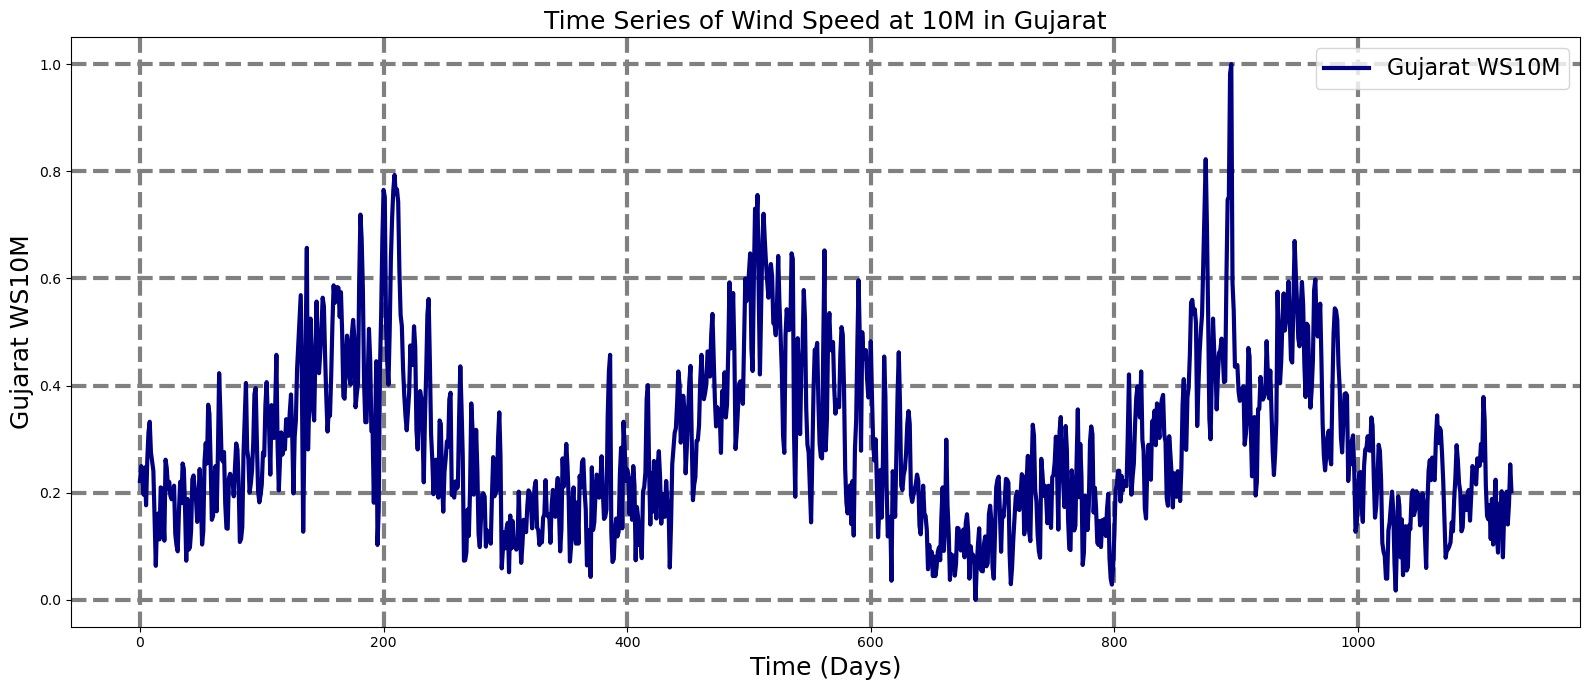

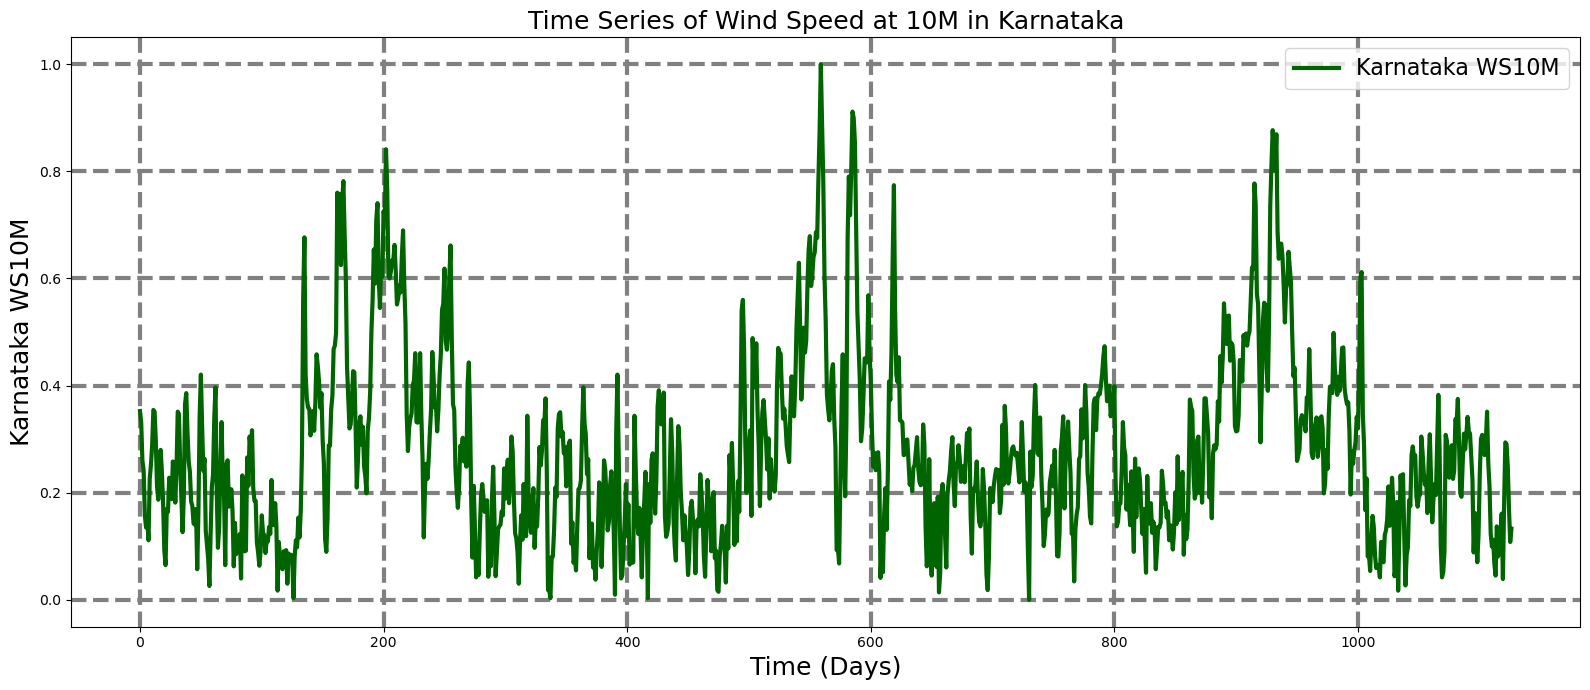

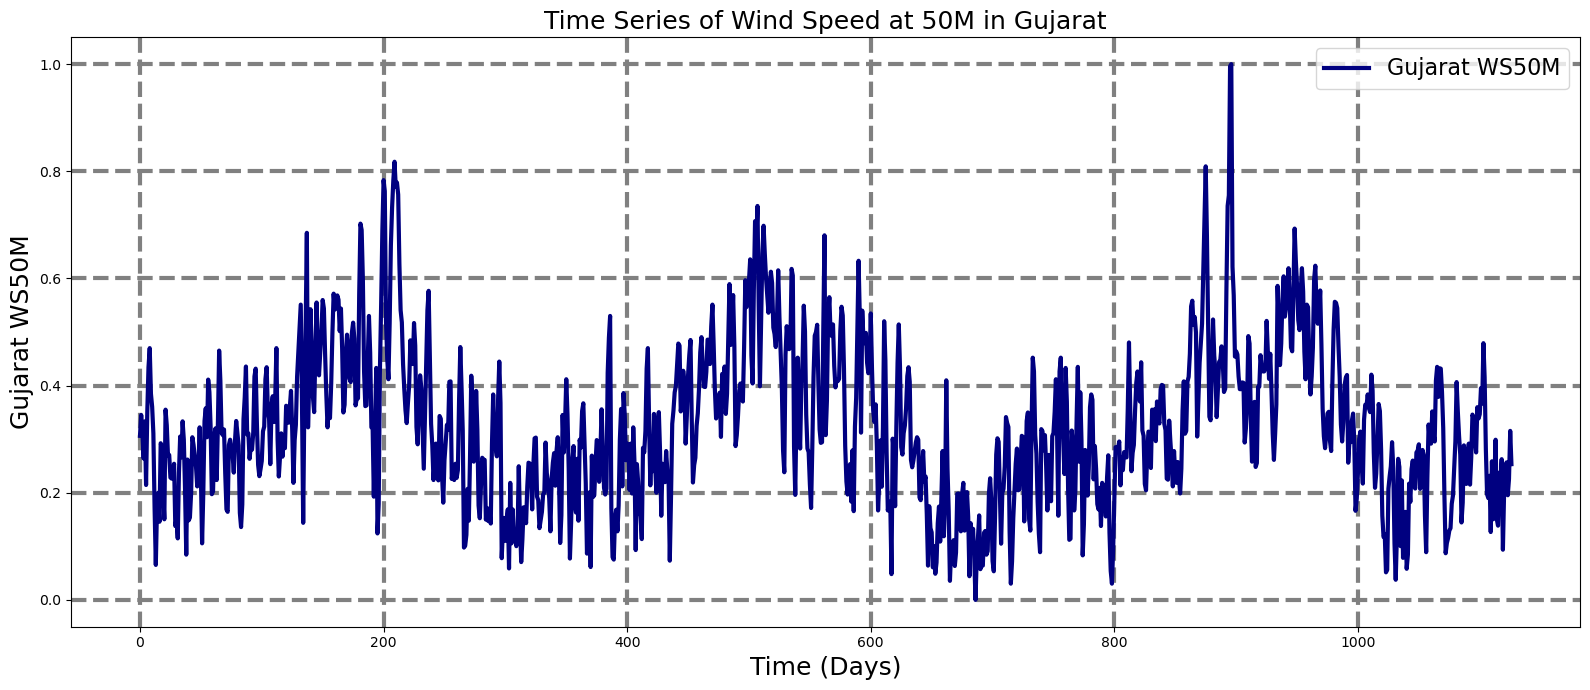

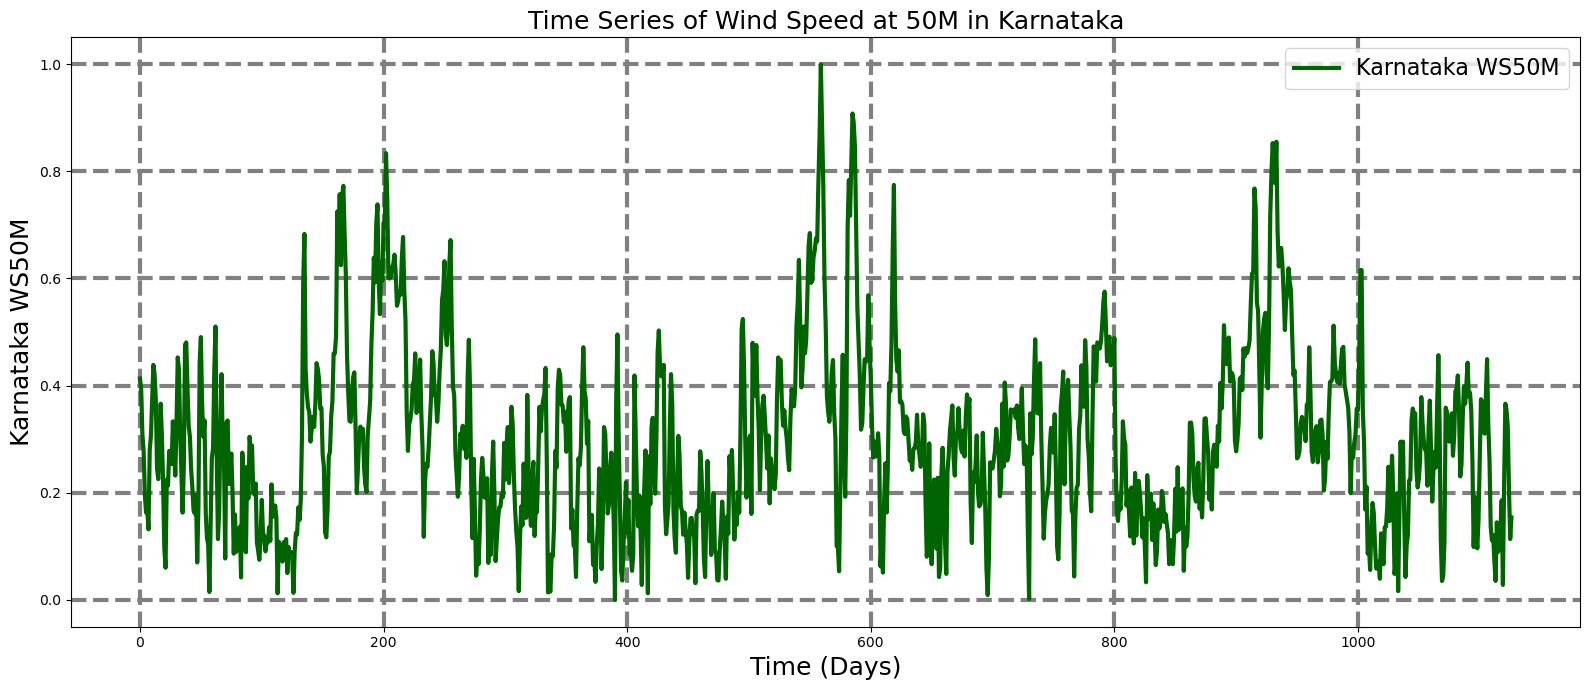

In [12]:
def create_time_series_plot(df, feature, title, label, color):
    plt.figure(figsize=(16, 7))  
    plt.plot(df[feature], color=color, label=label, linewidth=3)  
    plt.title(title, fontsize=18) 
    plt.xlabel('Time (Days)', fontsize=18)  
    plt.ylabel(label, fontsize=18)  
    plt.legend(fontsize=16) 
    plt.grid(True, which='major', linestyle='--', linewidth='3', color='grey')  
    plt.tight_layout()
    plt.show()


create_time_series_plot(guj_df, 'WS10M', 'Time Series of Wind Speed at 10M in Gujarat', 'Gujarat WS10M', 'navy')
create_time_series_plot(krntk_df, 'WS10M', 'Time Series of Wind Speed at 10M in Karnataka', 'Karnataka WS10M', 'darkgreen')
create_time_series_plot(guj_df, 'WS50M', 'Time Series of Wind Speed at 50M in Gujarat', 'Gujarat WS50M', 'navy')
create_time_series_plot(krntk_df, 'WS50M', 'Time Series of Wind Speed at 50M in Karnataka', 'Karnataka WS50M', 'darkgreen')


#  correlation matrices

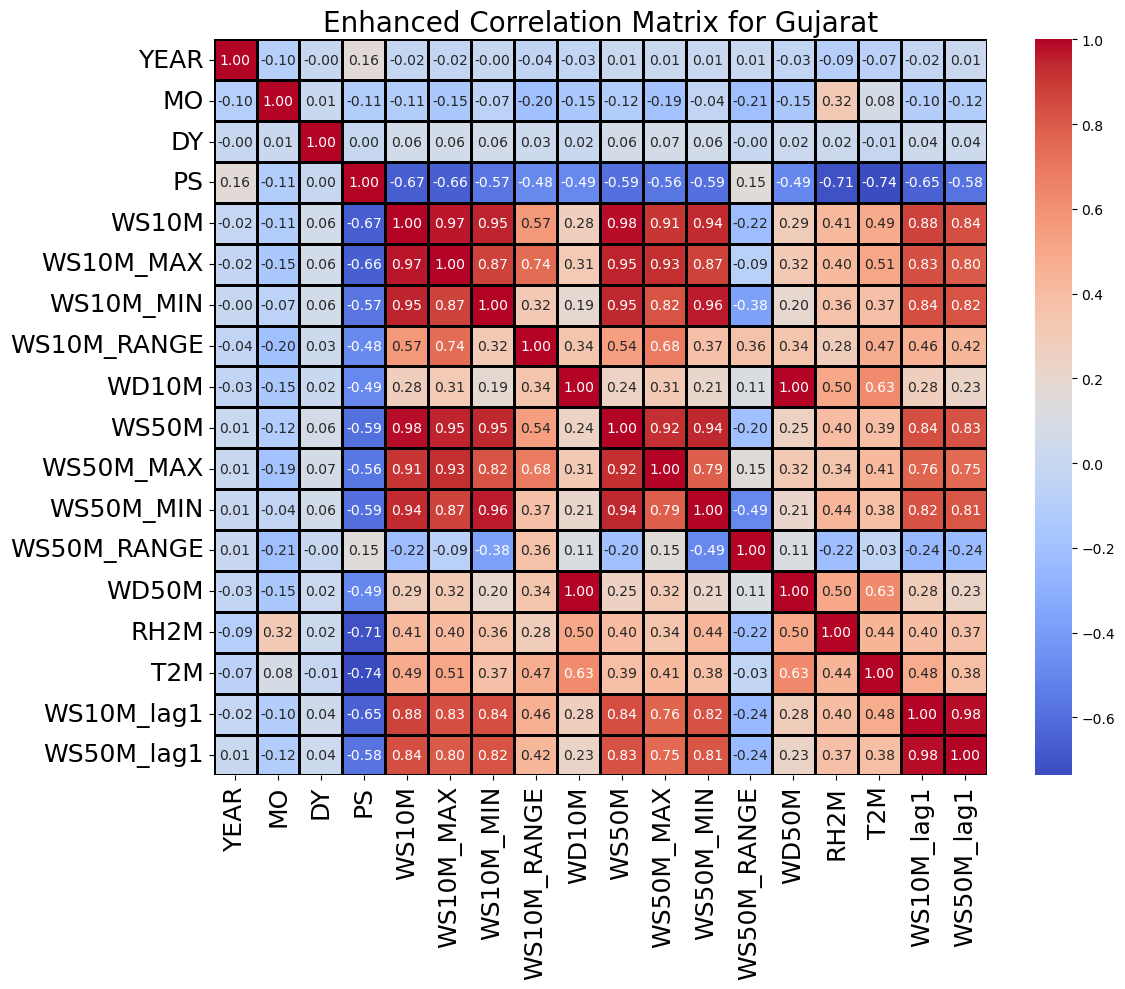

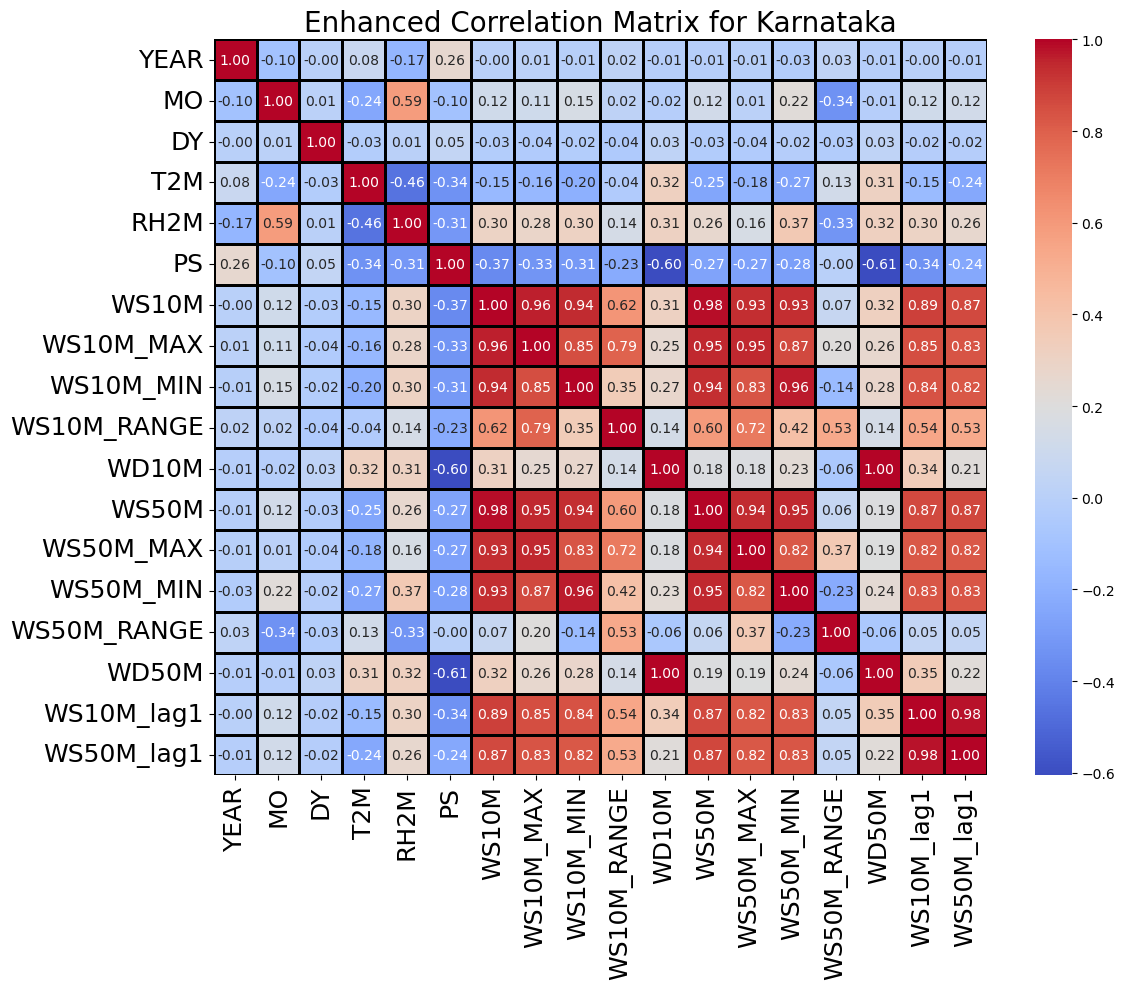

In [13]:
# Function to plot enhanced correlation matrices
def plot_correlation_matrix(df, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=2, linecolor='black')
    plt.title(title, fontsize=20)
    plt.xticks(fontsize=18, rotation=90)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(guj_df, 'Enhanced Correlation Matrix for Gujarat')
plot_correlation_matrix(krntk_df, 'Enhanced Correlation Matrix for Karnataka')


## Autocorrelation Plot
Autocorrelation plots show how the data correlates with itself at different lags. This is particularly useful for identifying seasonality or cyclical patterns in time-series data, which is crucial for LSTM models.

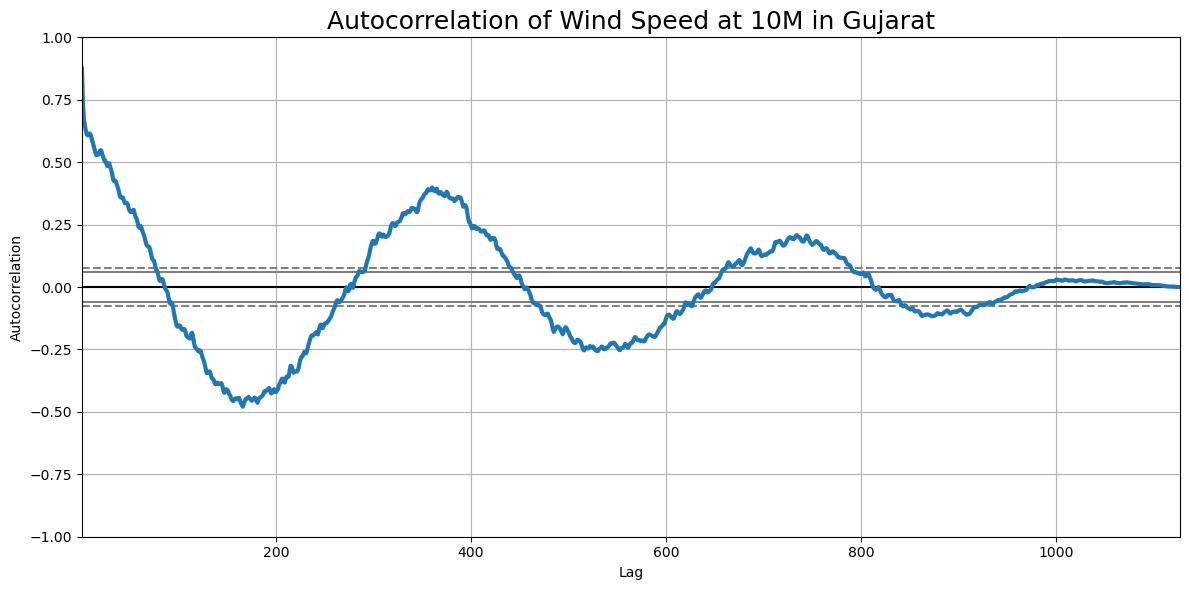

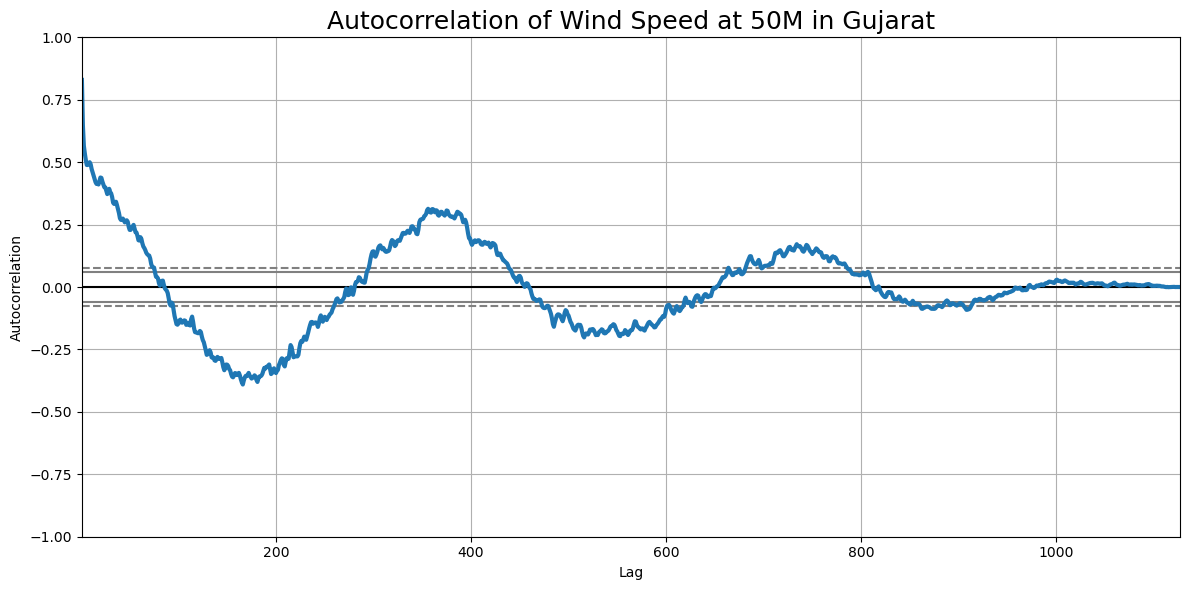

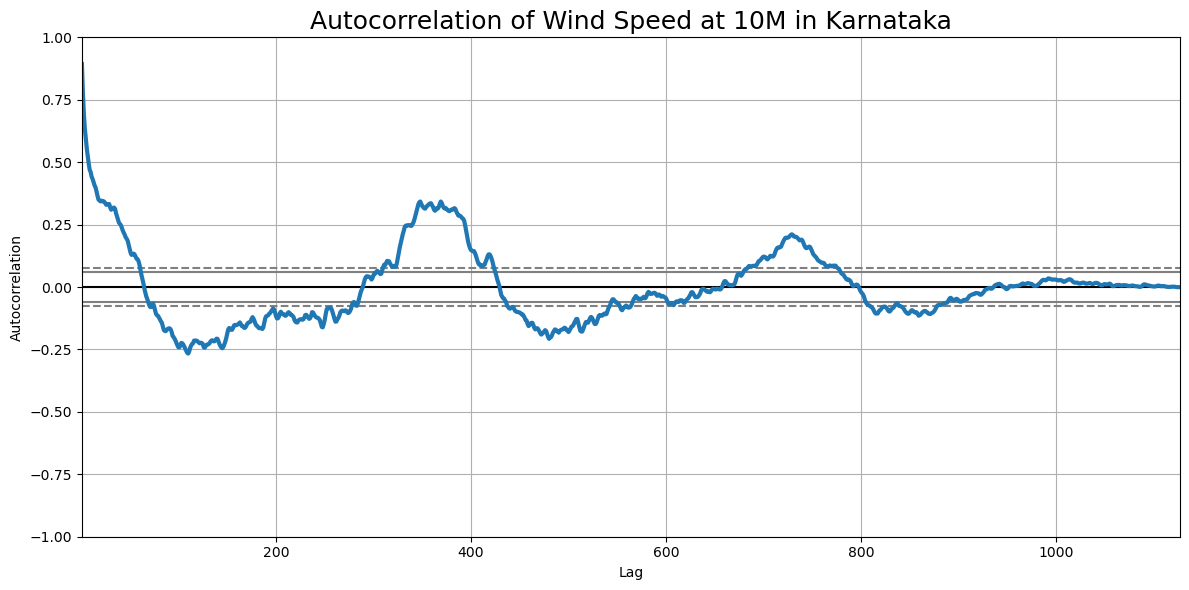

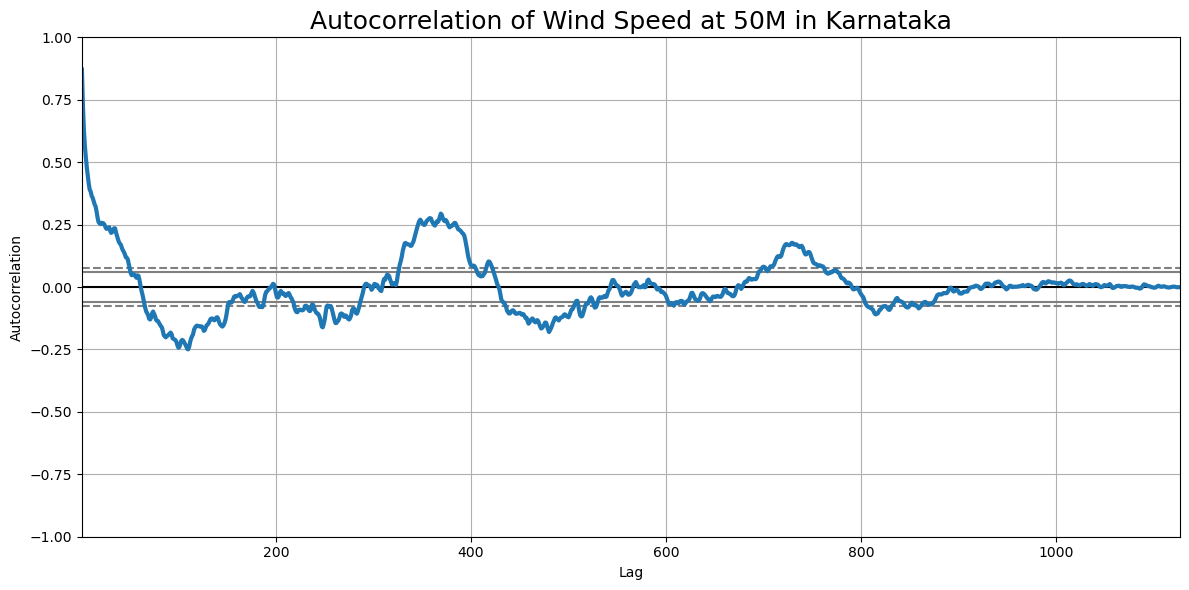

In [14]:
from pandas.plotting import autocorrelation_plot

# Function to create autocorrelation plots
def plot_autocorrelation(series, title):
    plt.figure(figsize=(12, 6))
    autocorrelation_plot(series, lw=3)
    plt.title(title, fontsize=18)
    plt.tight_layout()
    plt.show()

plot_autocorrelation(guj_df['WS10M'], 'Autocorrelation of Wind Speed at 10M in Gujarat')
plot_autocorrelation(guj_df['WS50M'], 'Autocorrelation of Wind Speed at 50M in Gujarat')
plot_autocorrelation(krntk_df['WS10M'], 'Autocorrelation of Wind Speed at 10M in Karnataka')
plot_autocorrelation(krntk_df['WS50M'], 'Autocorrelation of Wind Speed at 50M in Karnataka')


## Rolling Mean and Standard Deviation
Plotting the rolling mean and standard deviation can help visualize how the mean wind speed and its variability change over time. This can also help identify trends and the stability of time series.

#### The rolling mean and standard deviation plots for wind speeds at both 10 meters and 50 meters in Gujarat and Karnataka provide a smoothed view of how the wind speed changes over time, along with an indication of the variability around that mean. These plots are particularly useful for understanding trends, seasonal patterns, and volatility in wind speed data, which can be crucial for several applications including energy forecasting, agricultural planning, and environmental management.

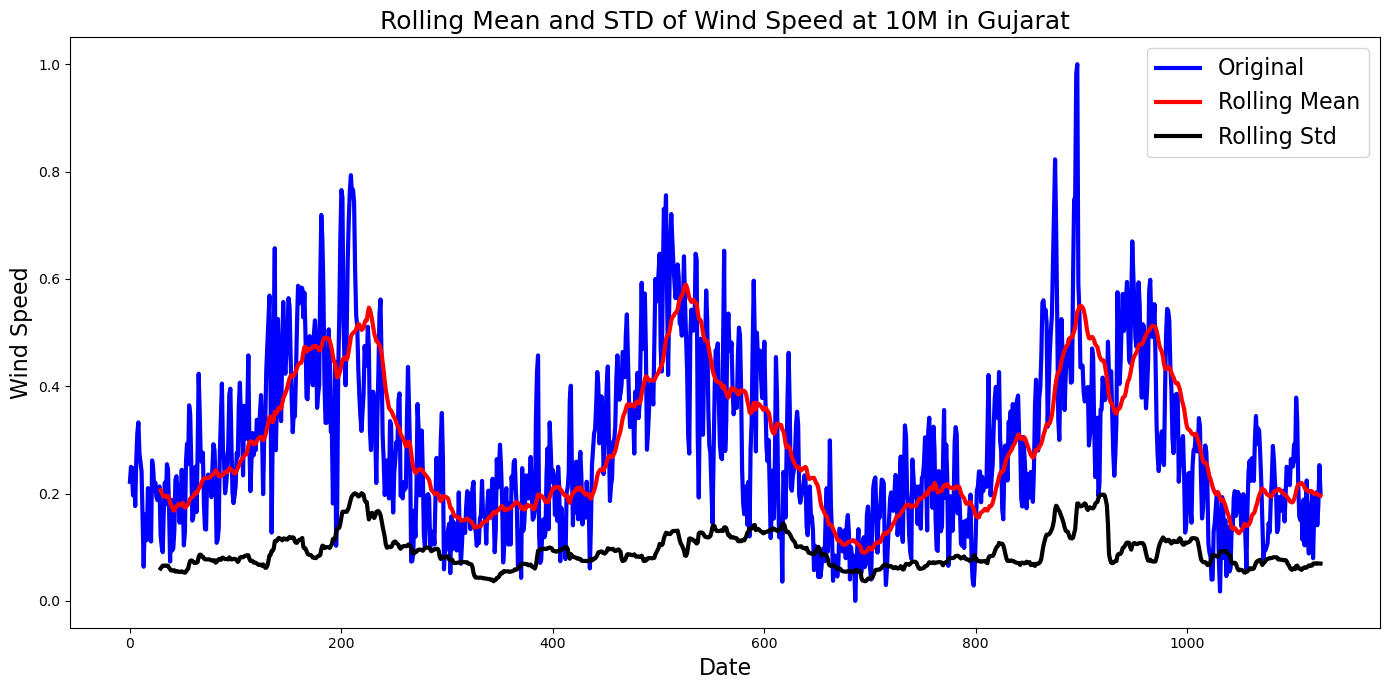

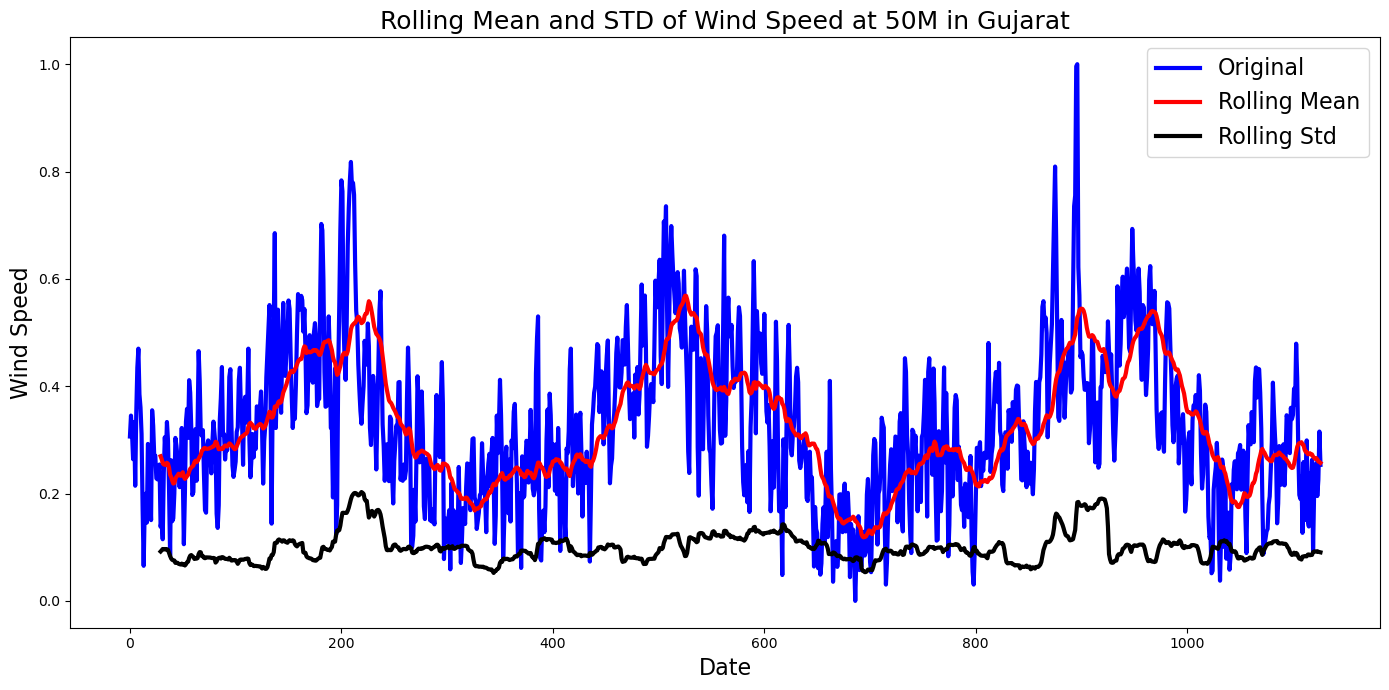

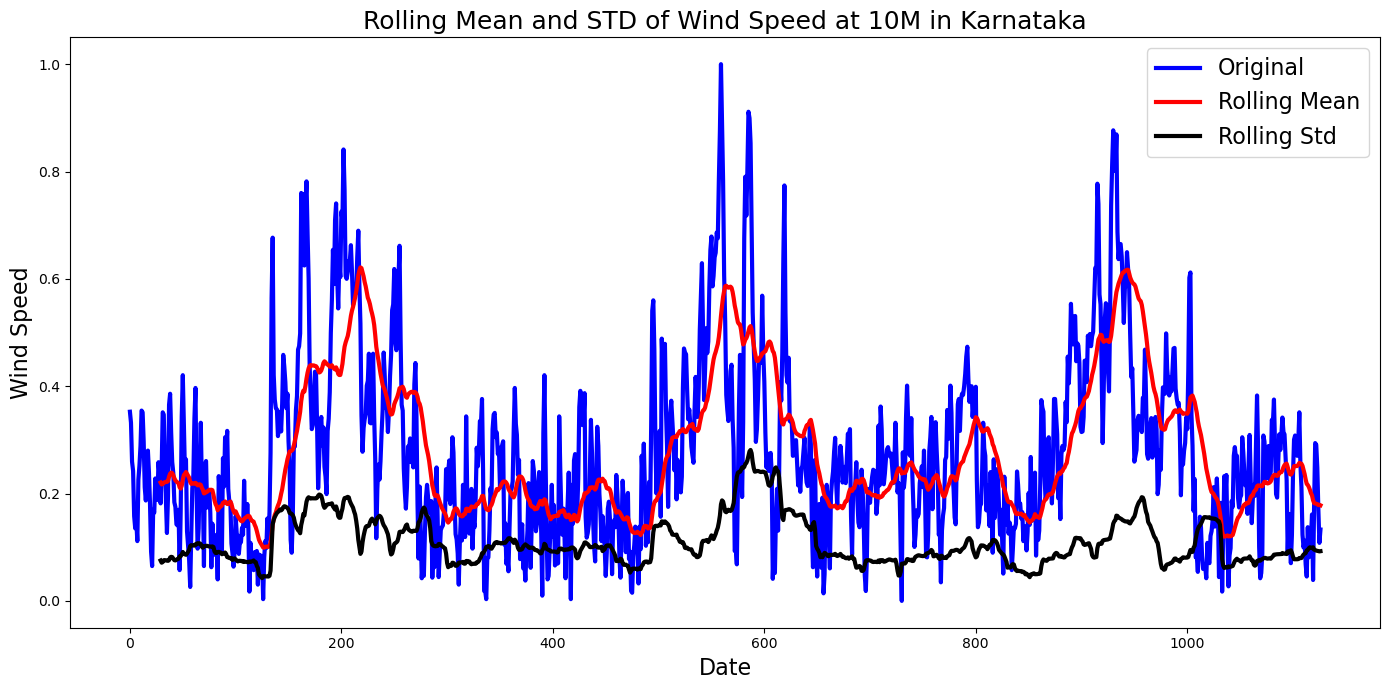

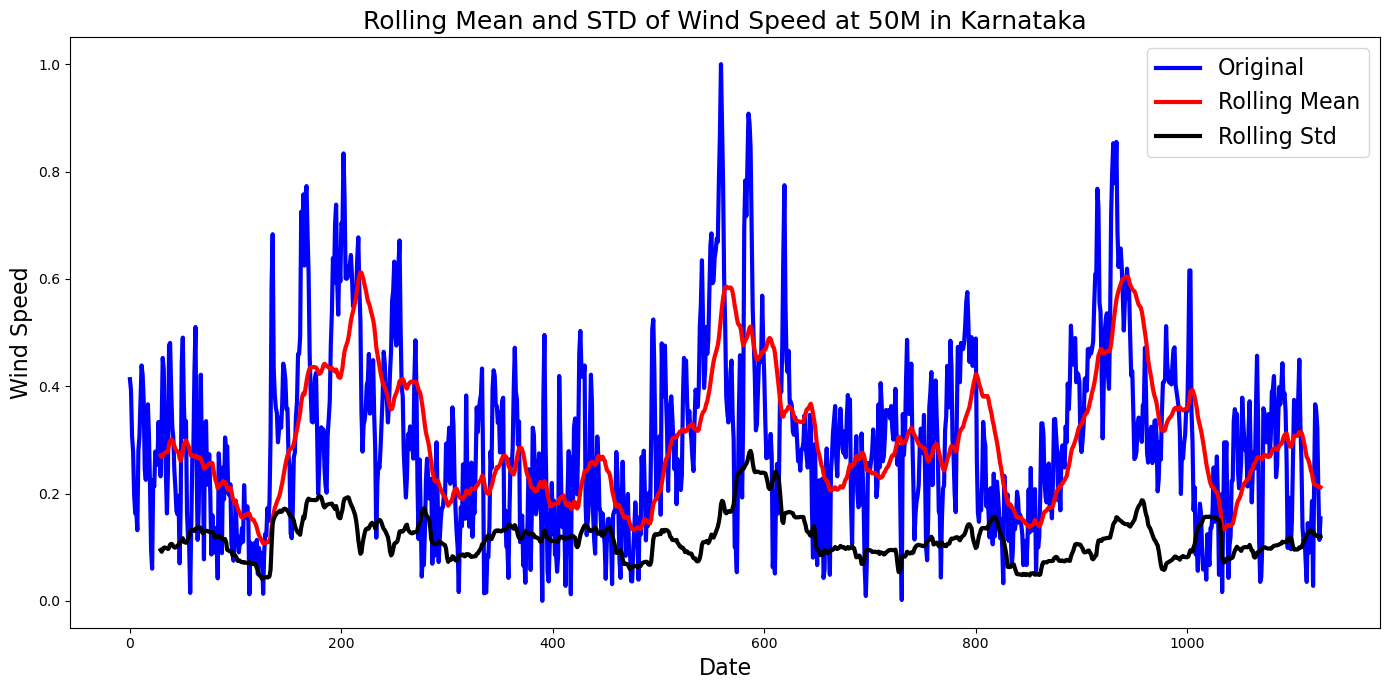

In [15]:

def plot_rolling_stats(series, title, window=30):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    plt.figure(figsize=(14, 7))  
    plt.plot(series, color='blue', label='Original', linewidth=3)  
    plt.plot(rolling_mean, color='red', label='Rolling Mean', linewidth=3)
    plt.plot(rolling_std, color='black', label='Rolling Std', linewidth=3)
    plt.legend(loc='best', fontsize=16) 
    plt.title(title, fontsize=18)  
    plt.xlabel('Date', fontsize=16)  
    plt.ylabel('Wind Speed', fontsize=16)  
    plt.tight_layout()
    plt.show()


plot_rolling_stats(guj_df['WS10M'], 'Rolling Mean and STD of Wind Speed at 10M in Gujarat')
plot_rolling_stats(guj_df['WS50M'], 'Rolling Mean and STD of Wind Speed at 50M in Gujarat')
plot_rolling_stats(krntk_df['WS10M'], 'Rolling Mean and STD of Wind Speed at 10M in Karnataka')
plot_rolling_stats(krntk_df['WS50M'], 'Rolling Mean and STD of Wind Speed at 50M in Karnataka')


In [16]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'WS10M' and 'WS50M' are the targets and everything else is a feature
X_guj = guj_df.drop(['WS10M', 'WS50M'], axis=1)
y_guj = guj_df[['WS10M', 'WS50M']]

# Splitting the data into training and testing sets
X_train_guj, X_test_guj, y_train_guj, y_test_guj = train_test_split(X_guj, y_guj, test_size=0.2, random_state=42)

# LSTM expects data in the format of [samples, time steps, features]
# Reshaping the input to be 3D with time steps=1
X_train_guj = np.reshape(X_train_guj.values, (X_train_guj.shape[0], 1, X_train_guj.shape[1]))
X_test_guj = np.reshape(X_test_guj.values, (X_test_guj.shape[0], 1, X_test_guj.shape[1]))


In [31]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'WS10M' and 'WS50M' are the targets and everbthing else is a feature
a_krntk = krntk_df.drop(['WS10M', 'WS50M'], axis=1)
b_krntk = krntk_df[['WS10M', 'WS50M']]

# Splitting the data into training and testing sets
a_train_krntk, a_test_krntk, b_train_krntk, b_test_krntk = train_test_split(a_krntk, b_krntk, test_size=0.2, random_state=42)


# Reshaping the input to be 3D with time steps=1
a_train_krntk = np.reshape(a_train_krntk.values, (a_train_krntk.shape[0], 1, a_train_krntk.shape[1]))
a_test_krntk = np.reshape(a_test_krntk.values, (a_test_krntk.shape[0], 1, a_test_krntk.shape[1]))


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_guj.shape[1], X_train_guj.shape[2])),  # LSTM layer with return_sequences=True for stacking
    LSTM(50, return_sequences=False),  # Another LSTM layer
    Dense(2)  # Output layer with 2 units for predicting WS10M and WS50M
])

model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# Training the model
history = model.fit(
    X_train_guj, y_train_guj,
    epochs=100,  
    batch_size=32,  
    validation_data=(X_test_guj, y_test_guj),
    verbose=2
)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 1, 50)               │          13,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,702 (131.65 KB)

 Trainable params: 33,702 (131.65 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
29/29 - 4s - 130ms/step - loss: 0.0330 - val_loss: 0.0234
Epoch 2/100
29/29 - 0s - 4ms/step - loss: 0.0241 - val_loss: 0.0223
Epoch 3/100
29/29 - 0s - 4ms/step - loss: 0.0241 - val_loss: 0.0221
Epoch 4/100
29/29 - 0s - 4ms/step - loss: 0.0244 - val_loss: 0.0227
Epoch 5/100
29/29 - 0s - 4ms/step - loss: 0.0235 - val_loss: 0.0221
Epoch 6/100
29/29 - 0s - 4ms/step - loss: 0.0238 - val_loss: 0.0220
Epoch 7/100
29/29 - 0s - 4ms/step - loss: 0.0235 - val_loss: 0.0220
Epoch 8/100
29/29 - 0s - 4ms/step - loss: 0.0250 - val_loss: 0.0224
Epoch 9/100
29/29 - 0s - 4ms/step - loss: 0.0234 - val_loss: 0.0220
Epoch 10/100
29/29 - 0s - 4ms/step - loss: 0.0242 - val_loss: 0.0221
Epoch 11/100
29/29 - 0s - 4ms/step - loss: 0.0242 - val_loss: 0.0223
Epoch 12/100
29/29 - 0s - 5ms/step - loss: 0.0240 - val_loss: 0.0224
Epoch 13/100
29/29 - 0s - 4ms/step - loss: 0.0240 - val_loss: 0.0241
Epoch 14/100
29/29 - 0s - 4ms/step - loss: 0.0242 - val_loss: 0.0223
Epoch 15/100
29/29 - 0s - 4ms/step -

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(a_train_krntk.shape[1], a_train_krntk.shape[2])),  # LSTM layer with return_sequences=True for stacking
    LSTM(50, return_sequences=False),  # Another LSTM layer
    Dense(2)  # Output layer with 2 units for predicting WS10M and WS50M
])

model.compile(optimizer='adam', loss='mean_squared_error')


print(model.summary())

# Training the model
history = model.fit(
    a_train_krntk, b_train_krntk,
    epochs=100,  
    batch_size=32,  
    validation_data=(a_test_krntk, b_test_krntk),
    verbose=2
)


C:\Users\Divanshi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 1, 50)               │          13,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,702 (131.65 KB)

 Trainable params: 33,702 (131.65 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
29/29 - 3s - 117ms/step - loss: 0.0474 - val_loss: 0.0259
Epoch 2/100
29/29 - 0s - 4ms/step - loss: 0.0304 - val_loss: 0.0241
Epoch 3/100
29/29 - 0s - 4ms/step - loss: 0.0286 - val_loss: 0.0240
Epoch 4/100
29/29 - 0s - 4ms/step - loss: 0.0287 - val_loss: 0.0240
Epoch 5/100
29/29 - 0s - 4ms/step - loss: 0.0283 - val_loss: 0.0240
Epoch 6/100
29/29 - 0s - 4ms/step - loss: 0.0286 - val_loss: 0.0240
Epoch 7/100
29/29 - 0s - 4ms/step - loss: 0.0284 - val_loss: 0.0243
Epoch 8/100
29/29 - 0s - 4ms/step - loss: 0.0288 - val_loss: 0.0240
Epoch 9/100
29/29 - 0s - 4ms/step - loss: 0.0285 - val_loss: 0.0240
Epoch 10/100
29/29 - 0s - 4ms/step - loss: 0.0286 - val_loss: 0.0242
Epoch 11/100
29/29 - 0s - 4ms/step - loss: 0.0283 - val_loss: 0.0240
Epoch 12/100
29/29 - 0s - 4ms/step - loss: 0.0287 - val_loss: 0.0241
Epoch 13/100
29/29 - 0s - 4ms/step - loss: 0.0296 - val_loss: 0.0245
Epoch 14/100
29/29 - 0s - 5ms/step - loss: 0.0297 - val_loss: 0.0242
Epoch 15/100
29/29 - 0s - 4ms/step -

## FOR GUJARAT
MSE AND RMSE for 10m
MSE AND RMSE for 50m
MAE for 10 and 50 m
R^2 for 10 and 50m

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from math import sqrt

# Making predictions
predictions = model.predict(X_test_guj)

# Calculate MSE and RMSE for WS10M
mse_ws10m = mean_squared_error(y_test_guj.iloc[:, 0], predictions[:, 0])
rmse_ws10m = sqrt(mse_ws10m)

# Calculate MSE and RMSE for WS50M
mse_ws50m = mean_squared_error(y_test_guj.iloc[:, 1], predictions[:, 1])
rmse_ws50m = sqrt(mse_ws50m)

print(f'WS10M - MSE: {mse_ws10m}, RMSE: {rmse_ws10m}')
print(f'WS50M - MSE: {mse_ws50m}, RMSE: {rmse_ws50m}') 


# Calculate MAE for WS10M and WS50M
mae_ws10m = mean_absolute_error(y_test_guj.iloc[:, 0], predictions[:, 0])
mae_ws50m = mean_absolute_error(y_test_guj.iloc[:, 1], predictions[:, 1])

# Calculate R-squared for WS10M and WS50M
r2_ws10m = r2_score(y_test_guj.iloc[:, 0], predictions[:, 0])
r2_ws50m = r2_score(y_test_guj.iloc[:, 1], predictions[:, 1])

print(f'WS10M - MAE: {mae_ws10m}, R-squared: {r2_ws10m}')
print(f'WS50M - MAE: {mae_ws50m}, R-squared: {r2_ws50m}')




8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
WS10M - MSE: 0.02279897662396782, RMSE: 0.1509932999307182
WS50M - MSE: 0.020066189175544206, RMSE: 0.14165517701638794
WS10M - MAE: 0.11964495256114614, R-squared: -0.018447059560092294
WS50M - MAE: 0.10829530019181335, R-squared: -0.013400143847147161


## FOR KARNATAKA
MSE AND RMSE for 10m
MSE AND RMSE for 50m
MAE for 10 and 50 m
R^2 for 10 and 50m

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from math import sqrt

# Making predictions
predictions = model.predict(a_test_krntk)

# Calculate MSE and RMSE for WS10M
mse_ws10m = mean_squared_error(b_test_krntk.iloc[:, 0], predictions[:, 0])
rmse_ws10m = sqrt(mse_ws10m)

# Calculate MSE and RMSE for WS50M
mse_ws50m = mean_squared_error(b_test_krntk.iloc[:, 1], predictions[:, 1])
rmse_ws50m = sqrt(mse_ws50m)

print(f'WS10M - MSE: {mse_ws10m}, RMSE: {rmse_ws10m}')
print(f'WS50M - MSE: {mse_ws50m}, RMSE: {rmse_ws50m}') 


# Calculate MAE for WS10M and WS50M
mae_ws10m = mean_absolute_error(b_test_krntk.iloc[:, 0], predictions[:, 0])
mae_ws50m = mean_absolute_error(b_test_krntk.iloc[:, 1], predictions[:, 1])

# Calculate R-squared for WS10M and WS50M
r2_ws10m = r2_score(b_test_krntk.iloc[:, 0], predictions[:, 0])
r2_ws50m = r2_score(b_test_krntk.iloc[:, 1], predictions[:, 1])

print(f'WS10M - MAE: {mae_ws10m}, R-squared: {r2_ws10m}')
print(f'WS50M - MAE: {mae_ws50m}, R-squared: {r2_ws50m}')



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
WS10M - MSE: 0.02682503811246814, RMSE: 0.1637835098917719
WS50M - MSE: 0.027067015711159045, RMSE: 0.164520563186366
WS10M - MAE: 0.12478813298893042, R-squared: -0.0008012240500774315
WS50M - MAE: 0.1297818230697656, R-squared: -0.0036398594378965754





16/16 [==============================] - 1s 2ms/step


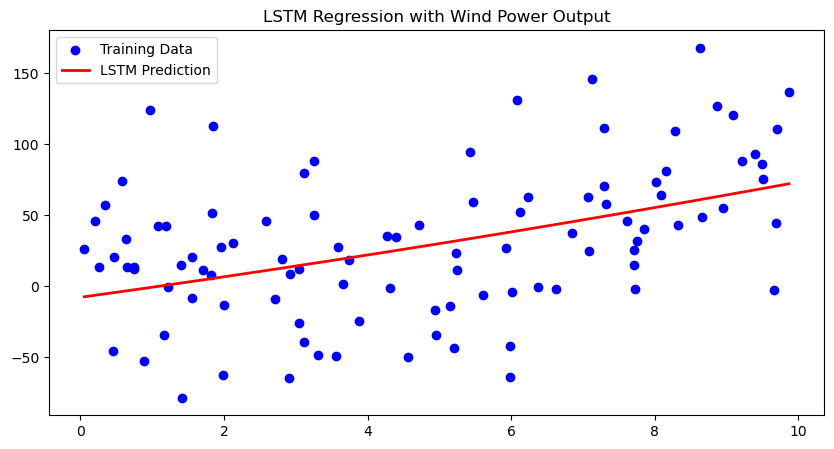

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Simulated dataset for demonstration
np.random.seed(42)
X_train_orig = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
WindPowerOutput = (X_train_orig ** 2).flatten() + np.random.randn(100) * 50  # Non-linear relation + noise

# Scaling the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_train_orig)
Y_scaled = scaler_y.fit_transform(WindPowerOutput.reshape(-1, 1))

# Splitting the dataset (though for time series, you'd usually not random split but take continuous sequences)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

# Reshaping data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=0)

# Generating new x values for plotting predictions
myline = np.linspace(min(X_train_orig), max(X_train_orig), 500).reshape(-1, 1)
myline_scaled = scaler_x.transform(myline)
myline_scaled = myline_scaled.reshape((myline_scaled.shape[0], 1, myline_scaled.shape[1]))

# Predict using the trained model
model_predictions = model.predict(myline_scaled)
model_predictions = scaler_y.inverse_transform(model_predictions)  # Inverse transform to original scale

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(X_train_orig, WindPowerOutput, color='blue', label='Training Data')
plt.plot(myline, model_predictions, color='red', label='LSTM Prediction', linewidth=2)
plt.title("LSTM Regression with Wind Power Output")
plt.legend()
plt.show()



In [18]:
import pandas as pd

# Corrected and complete data for Gujarat and Karnataka
data = {
    "Region": ["Gujarat", "Karnataka"] * 3,
    "Model": ["Random Forest", "Random Forest", "GRU", "GRU", "LSTM", "LSTM"],
    "MAE": [532481.95, 391.42, 0.159, 0.011, "0.120 (GUJ) / 0.108 (KAR)", "0.120 (GUJ) / 0.108 (KAR)"],
    "MSE": ["736,433,105,202.45", "1,295,209.51", "N/A", "N/A", "0.023 (GUJ) / 0.020 (KAR)", "0.023 (GUJ) / 0.020 (KAR)"],
    "RMSE": ["N/A", "N/A", 0.192, 0.014, "0.151 (GUJ) / 0.142 (KAR)", "0.151 (GUJ) / 0.142 (KAR)"],
    "R²": [-0.399, 1.000, -0.867, 0.993, "-0.018 (GUJ) / -0.013 (KAR)", "-0.018 (GUJ) / -0.013 (KAR)"]
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Apply enhanced styling with thicker borders and color
def apply_enhanced_styling(df):
    return df.style.set_properties(**{
        'border': '7px solid lightgrey',
        'border-collapse': 'collapse',
        'text-align': 'center',
        'font-size': '12pt'
    }).set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#4CAF50'), ('color', 'white'), ('border', '7px solid lightgrey')]
    }, {
        'selector': 'td',
        'props': [('border', '7px solid lightgrey')]
    }])

# Display the DataFrame with applied styles for enhanced visibility
display(apply_enhanced_styling(df))

# *For Karnataka, the superior predictive performance of Random Forest makes it the best choice based on the provided metric,
# hows exceptional performance, with an R² value close to 1. This high R² value suggests that the Random Forest model can almost perfectly predict the wind power output.
# Wind power output in Karnataka may have a more linear relationship or are well captured by the decision trees within the Random Forest.


# *Computational Efficiency:-
# GRUs are generally considered to be computationally more efficient than LSTMs. This efficiency stems from the GRU's simpler structure, which has fewer parameters than an LSTM. This can lead to faster training times and less demand on computational resources, which is an important consideration when processing large datasets or when computational resources are limited.
# LSTMs, while potentially offering a slight edge in capturing longer-term dependencies due to their more complex architecture, might not justify the additional computational overhead in all scenarios, especially if the performance gain over GRUs is marginal.


# *Predictive Accuracy:-
# Both GRU and LSTM models offer better accuracy than the Random Forest model in Gujarat, as indicated by their lower MAE and RMSE values. This suggests they are more capable of handling the dataset's nuances, likely due to their ability to process sequential and temporal dependencies inherent in wind power data.
# While the R² values for both models are negative, indicating challenges in fully capturing the dataset's variance, this metric alone doesn't disqualify them. The lower error metrics (MAE, RMSE) suggest they still provide valuable predictions.

,Region,Model,MAE,MSE,RMSE,R²
0,Gujarat,Random Forest,532481.950000,"736,433,105,202.45",N/A,-0.399000
1,Karnataka,Random Forest,391.420000,"1,295,209.51",N/A,1.000000
2,Gujarat,GRU,0.159000,N/A,0.192000,-0.867000
3,Karnataka,GRU,0.011000,N/A,0.014000,0.993000
4,Gujarat,LSTM,0.120 (GUJ) / 0.108 (KAR),0.023 (GUJ) / 0.020 (KAR),0.151 (GUJ) / 0.142 (KAR),-0.018 (GUJ) / -0.013 (KAR)
5,Karnataka,LSTM,0.120 (GUJ) / 0.108 (KAR),0.023 (GUJ) / 0.020 (KAR),0.151 (GUJ) / 0.142 (KAR),-0.018 (GUJ) / -0.013 (KAR)


In [7]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import pickle
from tensorflow.keras.models import load_model

# Assume 'model_gujarat' is your trained LSTM model and 'scaler_gujarat' is an instance of MinMaxScaler.
forecast_days = 180
last_sequence_gujarat = np.array([guj_df.iloc[-1, 2:].values])  # last known values (excluding date columns)

# Prepare to collect predictions for Gujarat
future_predictions_gujarat = []

# Loop through the number of days you want to predict for Gujarat
for day in range(forecast_days):
    next_step_prediction_gujarat = model_gujarat.predict(last_sequence_gujarat[np.newaxis, :, :, :, :])
    next_step_prediction_transformed_gujarat = scaler_gujarat.inverse_transform(next_step_prediction_gujarat.reshape(-1, 2))[0]
    future_predictions_gujarat.append(next_step_prediction_transformed_gujarat)
    last_sequence_gujarat = np.roll(last_sequence_gujarat, -1, axis=2)
    last_sequence_gujarat[0, -1, :] = next_step_prediction_gujarat.reshape(2, 1)

# Generate future dates starting from tomorrow for Gujarat
dates_gujarat = [datetime.now() + timedelta(days=i) for i in range(forecast_days)]

# Create and display DataFrame for Gujarat
df_predictions_gujarat = pd.DataFrame(future_predictions_gujarat, columns=['Predicted WS10M', 'Predicted WS50M'], index=dates_gujarat)
df_predictions_gujarat.index.name = 'Date'

print(df_predictions_gujarat.head())


NameError: name 'model_gujarat' is not defined